In [7]:
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
from keras.layers import InputLayer

In [56]:
from keras.callbacks import TensorBoard
import time
tensorboard = TensorBoard(log_dir='logs/{}'.format(time.time()))


In [8]:
train_path = 'data/train'
test_path = 'data/test'
valid_path = 'data/valid'

In [11]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size = (224,224), classes = ['dog', 'cat'], batch_size = 30)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size = (224,224), classes = ['dog', 'cat'], batch_size = 10)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size = (224,224), classes = ['dog', 'cat'], batch_size = 10)

Found 602 images belonging to 2 classes.
Found 205 images belonging to 2 classes.
Found 202 images belonging to 2 classes.


In [29]:
def plots(ims, figsize = (12, 6), rows = 3, interp = False, titles = None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0, 2, 3, 1))
    
    f=plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize = 16)
        plt.imshow(ims[i], interpolation = None if interp else 'none')

In [13]:
imgs , labels = next(train_batches)

/Users/bharathkumar/anaconda3/lib/python3.6/site-packages/matplotlib/text.py:1190: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


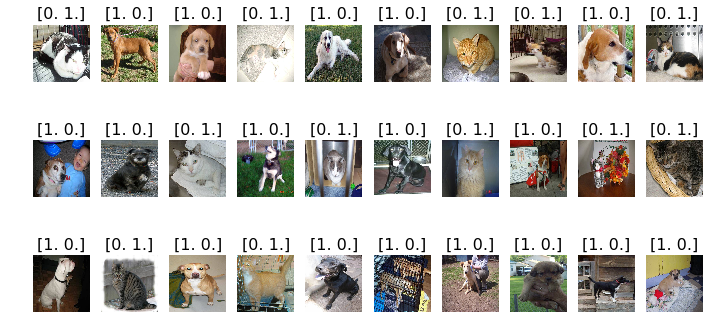

In [30]:
plots(imgs, titles = labels)

###Building and Training a CNN Model

In [31]:
model = Sequential()

In [32]:
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape=(224,224,3)))

Instructions for updating:
Colocations handled automatically by placer.


In [34]:
model.add(Flatten())

In [35]:
model.add(Dense(2, activation = 'softmax'))

In [37]:
model.compile(Adam(lr = 0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [57]:
model.fit_generator(train_batches, steps_per_epoch = 10, validation_data = valid_batches, validation_steps = 10, epochs = 5, verbose = 2, callbacks=[tensorboard])

Epoch 1/5
 - 12s - loss: 6.8872 - acc: 0.5727 - val_loss: 9.6358 - val_acc: 0.4022
Epoch 2/5
 - 13s - loss: 8.0053 - acc: 0.5033 - val_loss: 7.7367 - val_acc: 0.5200
Epoch 3/5
 - 13s - loss: 8.0260 - acc: 0.5020 - val_loss: 8.4094 - val_acc: 0.4783
Epoch 4/5
 - 15s - loss: 7.7904 - acc: 0.5167 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 5/5
 - 14s - loss: 8.8513 - acc: 0.4508 - val_loss: 7.8839 - val_acc: 0.5109


/Users/bharathkumar/anaconda3/lib/python3.6/site-packages/matplotlib/text.py:1190: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


ValueError: num must be 1 <= num <= 9, not 10

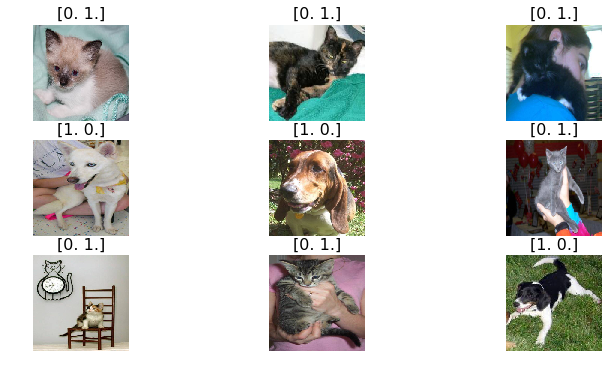

In [43]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles= test_labels)

In [44]:
test_labels = test_labels[:,0]
test_labels

array([0., 0., 0., 1., 1., 0., 0., 0., 1., 1.], dtype=float32)

In [45]:
prediction = model.predict_generator(test_batches, steps = 1,verbose = 2)

In [46]:
prediction

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [47]:
cm = confusion_matrix(test_labels, prediction[:,0])

In [48]:
cm

array([[6, 0],
       [4, 0]])

In [49]:
def plot_confusion_matrix(cm, classes, normalize = False, title = 'Confusion Matrix', cmap = plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix without normalization")
    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i,cm[i, j], horizontalalignment = 'center', color = 'white' if cm[i,j]> thresh else 'black')
        
    
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
        

Confusion Matrix without normalization
[[6 0]
 [4 0]]


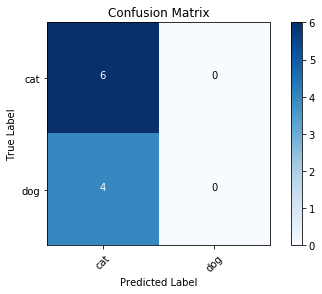

In [50]:
cm_plot_labels = ['cat', 'dog']

plot_confusion_matrix(cm, cm_plot_labels, title = 'Confusion Matrix')

###VGG16

In [58]:
vgg16_model = keras.applications.vgg16.VGG16()

In [60]:
vgg16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [61]:
type(vgg16_model)

tensorflow.python.keras.engine.training.Model

In [64]:
model = Sequential()


In [69]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

TypeError: The added layer must be an instance of class Layer. Found: <tensorflow.python.keras.engine.input_layer.InputLayer object at 0x1a23fbd550>

In [74]:
model = Sequential() 
model.add(InputLayer(input_tensor=vgg16_model.layers[0])) 
for layer in vgg16_model.layers[1:]: 
    model.add(layer) 

AttributeError: 'InputLayer' object has no attribute 'get_shape'

In [75]:
model = Sequential() 
for layer in vgg16_model.layers[:-1]: 
         model.add(layer)

TypeError: The added layer must be an instance of class Layer. Found: <tensorflow.python.keras.engine.input_layer.InputLayer object at 0x1a23fbd550>